In [26]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from collections import Counter
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from geopy.distance import vincenty
import math
import numpy as np
from tqdm import tqdm

In [37]:
districts = gpd.read_file('../../../AUD_Metropolitan_Data/Data dive/moscow_boundaries_demography.geojson')

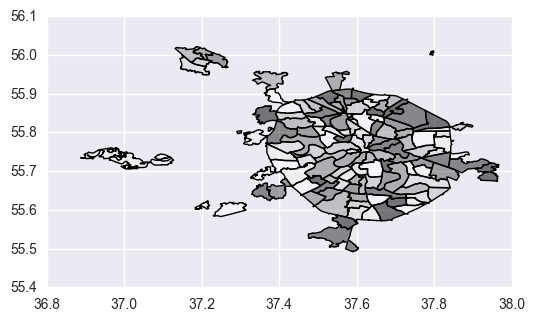

In [39]:
districts.plot()

In [45]:
districts.to_crs(epsg=3857, inplace=True)

In [108]:
names = ['Horoshevo-Mnevniki', 'Izmajlovo', 'Fili-Davydkovo', 'Akademicheskij']

In [47]:
for name in names:
    districts[districts.District == name].to_file('{}_district.geojson'.format(name), driver='GeoJSON')

In [86]:
name = 'Nagornyj'
districts[districts.District == name].to_file('{}_district.geojson'.format(name), driver='GeoJSON')

In [13]:
horoshevo_mnevniki = [37.402587,55.740768,37.520751,55.795459]

In [14]:
academ = [37.550769,55.672134,37.602839,55.707183]

In [15]:
fili_dav = [37.436771,55.708158,37.514191,55.74354]

In [16]:
perovo = [37.719085,55.734584,37.808815,55.768219]

In [17]:
perovo

[37.719085, 55.734584, 37.808815, 55.768219]

In [32]:
district = districts[districts.District == name]

In [33]:
district['bbox'] = grid['geometry'].unary_union

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
district

,5et_ratio,Area,District,TotalMen,TotalMen18to27,TotalMen18to60,TotalMenOlder60,TotalPopulation,TotalPopulationOfRetirementAge,TotalPopulationUnder18,TotalPopulationWorkingAge,TotalWomen,TotalWomen18to55,TotalWomenOlder55,buildings_count,geometry,id,total_houses_count,bbox
5,0.513514,Severo-Zapadnyj administrativnyj okrug,Horoshevo-Mnevniki,0.415467,0.036306,0.22728,0.122232,196634,0.426706,0.130196,0.442975,0.584533,0.215695,0.304474,266,(POLYGON ((4174906.234258182 7516938.227324471...,5,518,"POLYGON ((37.402587 55.740768, 37.402587 55.74..."


In [41]:
districts.District.unique()

array(['Vnukovo', 'Kuntsevo', 'Krylatskoe', 'Meschanskij', "Sokol'niki",
       'Horoshevo-Mnevniki', 'Schukino', 'Strogino', 'Mitino', 'Kurkino',
       "Kuz'minki", 'Donskoj', 'Levoberezhnyj', 'Hovrino',
       'Zapadnoe Degunino', 'Timirjazevskij', 'Koptevo', 'Dmitrovskij',
       'Severnoe Tushino', 'Sokol', 'Savelovskij', 'Otradnoe',
       'Molzhaninovskij', 'Severnyj', 'Vostochnoe Degunino', 'Golovinskij',
       'Begovoj', 'Horoshevskij', 'Vojkovskij', 'Aeroport',
       'Juzhnoe Tushino', 'Pokrovskoe-Streshnevo', 'Beskudnikovskij',
       "Altuf'evskij", 'Lianozovo', 'Bibirevo', 'Severnoe Medvedkovo',
       'Juzhnoe Medvedkovo', 'Fili-Davydkovo', 'Filevskij Park',
       'Dorogomilovo', 'Ramenki', 'Solntsevo', 'Novo-Peredelkino',
       'Jaroslavskij', 'Rostokino', "Tekstil'schiki", 'Ljublino',
       'Kapotnja', "Mar'ino", 'Pechatniki', 'Nagatinskij Zaton',
       "Moskvorech'e-Saburovo", 'Orehovo-Borisovo Severnoe',
       'Orehovo-Borisovo Juzhnoe', 'Zjablikovo', 'Brateevo

In [52]:
def bbox_contain(point, bbox):
    return bbox.contains(point)

In [51]:
google_places = gpd.read_file('moscow_google_places.geojson')

In [61]:
google_places['Horoshevo-Mnevniki'].value_counts()

False    498936
True       4351
Name: Horoshevo-Mnevniki, dtype: int64

In [62]:
for name in tqdm(names[1:]):
    district = districts[districts.District == name]['geometry']
    google_places[name] = google_places['geometry'].apply(lambda x: bbox_contain(x, district))

100%|██████████| 3/3 [06:05<00:00, 121.80s/it]


In [85]:
for name in names[2:]:
    google_places[google_places[name] == True].loc[:, :'type'].to_file('{}_google_places.geojson'.format(name), driver='GeoJSON')

In [87]:
district = districts[districts.District == name]['geometry']
google_places[name] = google_places['geometry'].apply(lambda x: bbox_contain(x, district))

Exception ignored in: <bound method Collection.__del__ of <open Collection '/Users/elena/Documents/Habidatum/AUD/Data dive/dd2/Izmajlovo_google_places.geojson:OgrGeoJSON', mode 'w' at 0x119dd4c50>>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/fiona/collection.py", line 418, in __del__
    self.__exit__(None, None, None)
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/fiona/collection.py", line 413, in __exit__
    self.close()
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/fiona/collection.py", line 397, in close
    self.flush()
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/fiona/collection.py", line 386, in flush
    if self.session is not None and self.session.get_length() > 0:
  File "fiona/ogrext.pyx", line 498, in fiona.ogrext.Session.get_length (fiona/ogrext2.c:10090)
ValueError: Null laye

In [88]:
google_places

,geometry,id,lat,lon,name,newtype,type,Horoshevo-Mnevniki,Izmajlovo,Fili-Davydkovo,Akademicheskij,Nagornyj
0,POINT (4213649.246444725 7544827.0211538),ChIJc0Z46owttUYRYyy2b7HDfW0,55.931680,37.851855,Korolyov,Outdoor spaces,locality,False,False,False,False,False
1,POINT (4224555.083374352 7549451.106660288),ChIJh7l_f1sstUYRv3Ar27kDNL8,55.954942,37.949824,"Kudinovskiy trubnyy zavod ""Cyklon""",Retail,store,False,False,False,False,False
2,POINT (4224000.934949184 7550455.512773863),ChIJP-lTqkMstUYRoIYydV_eVyw,55.959993,37.944846,Аквапрофит,Everyday services,general_contractor,False,False,False,False,False
3,POINT (4224446.402155492 7549840.484897826),ChIJ60FwP_gstUYRSj6Hr4X8eRA,55.956900,37.948848,Автомит интернет магазин авто запчастей,Retail,store,False,False,False,False,False
4,POINT (4224513.282905559 7549113.941142068),ChIJAQAAcFsstUYR_eFFtg4O0FQ,55.953246,37.949449,Aleks OOO,Retail,furniture_store,False,False,False,False,False
5,POINT (4224330.663280915 7550060.77408919),ChIJB17rM0MstUYRKxyFrCixg4s,55.958008,37.947808,Автомаляр,Retail,store,False,False,False,False,False
6,POINT (4224402.130394003 7549583.535205862),ChIJ24r5YVsstUYRiSsLm_zslok,55.955608,37.948450,ChP Ugryumov s. V.,Outdoor spaces,point_of_interest,False,False,False,False,False
7,POINT (4224540.34467377 7549361.649086788),ChIJMXn3vFwstUYRUqyTGJ8nFQc,55.954492,37.949692,Стронг Моторс,Retail,store,False,False,False,False,False
8,POINT (4224173.457896013 7551537.319844974),ChIJr7KNL2ostUYRVMfpJZiddtc,55.965432,37.946396,141284,Outdoor spaces,cemetery,False,False,False,False,False
9,POINT (4223913.849711535 7551469.238780987),ChIJ2Y-5FGostUYRMGE4gGxXvP8,55.965090,37.944064,nps,Car services,gas_station,False,False,False,False,False


In [89]:
google_places[google_places[name] == True].loc[:, :'type'].to_file('{}_google_places.geojson'.format(name), driver='GeoJSON')

In [101]:
buildings = gpd.read_file('../../../AUD_Metropolitan_Data/Data dive/Khrushchevki_data_cut_moscow.geojson')

In [109]:
for name in names:
    buildings[name] = buildings['geometry'].apply(lambda x: bbox_contain(x, district))

In [111]:
for name in names:
    buildings[buildings[name] == True].loc[:, :'year'].to_file('{}_chkruchevki.geojson'.format(name), driver='GeoJSON')

In [105]:
buildings.to_crs(epsg=3857,inplace=True)

In [104]:
district

58    POLYGON ((4186028.97721562 7497052.983897826, ...
Name: geometry, dtype: object

In [110]:
buildings

,area,area_land,area_live,area_nonlive,area_parking,critical_conditions,geometry,house_id,house_type,id,...,service_last_date,service_month,service_year,sportground,year,Nagornyj,Horoshevo-Mnevniki,Izmajlovo,Fili-Davydkovo,Akademicheskij
0,4688.10,0.0,3722.90,965.20,0.0,0.0,POINT (4177126.969043915 7522343.297027831),7840091,apartment house,0,...,01.03.2010,3.0,2010.0,0.0,1959.0,False,False,False,False,False
1,1882.60,0.0,1882.60,0.00,0.0,0.0,POINT (4177236.952700818 7522356.176236206),7840108,apartment house,1,...,01.03.2010,3.0,2010.0,0.0,1965.0,False,False,False,False,False
2,4480.60,0.0,4333.00,147.60,0.0,0.0,POINT (4177399.033879413 7522366.281476306),7840136,apartment house,2,...,01.03.2010,3.0,2010.0,0.0,1957.0,False,False,False,False,False
3,4018.80,0.0,4018.80,0.00,0.0,0.0,POINT (4177249.977081241 7522452.473768324),7840164,apartment house,3,...,01.03.2010,3.0,2010.0,0.0,1960.0,False,False,False,False,False
4,3395.40,0.0,3395.40,826.76,0.0,0.0,POINT (4177232.94519915 7522865.219409044),7840200,apartment house,4,...,01.03.2010,3.0,2010.0,0.0,1960.0,False,False,False,False,False
5,4142.20,0.0,4142.20,0.00,0.0,0.0,POINT (4177316.9914147 7522614.755664146),7839577,apartment house,5,...,01.03.2010,3.0,2010.0,0.0,1961.0,False,False,False,False,False
6,4970.40,0.0,4433.60,536.80,0.0,0.0,POINT (4177360.962613562 7522801.215636984),7839598,apartment house,6,...,01.03.2010,3.0,2010.0,0.0,1961.0,False,False,False,False,False
7,2499.40,0.0,2499.40,0.00,0.0,0.0,POINT (4177483.97065089 7522900.292908885),7839621,apartment house,7,...,01.03.2010,3.0,2010.0,0.0,1963.0,False,False,False,False,False
8,1759.00,0.0,1568.30,6.70,0.0,0.0,POINT (4177400.035754832 7523434.539501856),7839641,apartment house,8,...,01.05.2015,5.0,2015.0,0.0,1959.0,False,False,False,False,False
9,2551.80,0.0,2481.50,70.30,0.0,0.0,POINT (4177538.962479342 7523001.551196352),7839696,apartment house,9,...,01.03.2010,3.0,2010.0,0.0,1960.0,False,False,False,False,False
